In [7]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_venn as vn
import seaborn as sns
import tensorflow as tf

#import custom modules
import sys
sys.path.insert(0,'/Users/frederickkorbel/Documents/projects/paper/mlcis/utils')

import integrated_gradients as ig
import my_utils
from metaplot import Metaplot,one_hot_encode
import plotseqlogo as sql

def count_gc_perc(seq):

    g_count=seq.count('G')
    c_count=seq.count('C')
    gc_perc=((g_count+c_count)/len(seq))*100

    return gc_perc

def gc(dataframe, seq_column='utr'):

    dataframe['gc_perc']=[count_gc_perc(row) for row in dataframe[seq_column]]
    
    return dataframe

In [3]:
#import the full libraries and count gc content
synthetic_library=gc(pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/seelig/Samples/GSM3130435_egfp_unmod_1.csv', index_col=[0]).sort_values('total', ascending = False).reset_index(drop = True).iloc[:280000])
synthetic_library['dataset']='synthetic'

human_library=pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/seelig/Samples/GSM3130443_designed_library.csv', index_col=[0])
human_library = gc(human_library[(human_library['library'] == 'human_utrs') | (human_library['library'] == 'snv')].sort_values('total', ascending = False).reset_index(drop = True).iloc[:25000])
human_library['dataset']='human'

#make a df with gc content per library
gc_df=pd.DataFrame({'synthetic':synthetic_library['gc_perc'], 'human':human_library['gc_perc']})
libraries=pd.concat([synthetic_library, human_library], ignore_index=True)

/var/folders/6b/4m6tvsws1rvb767d463fsk7r0000gn/T/ipykernel_23957/1692742325.py:5: DtypeWarning: Columns (33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  human_library=pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/seelig/Samples/GSM3130443_designed_library.csv', index_col=[0])


(0.0, 0.005)

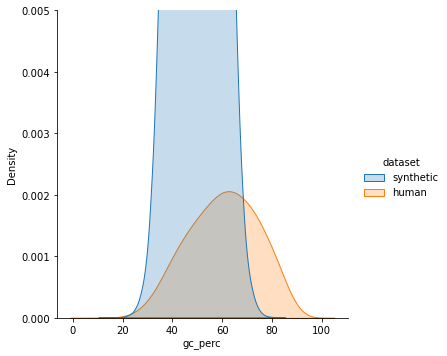

In [4]:
sns.displot(libraries, x='gc_perc', hue='dataset', kind='kde', fill = True, bw_adjust=2)
plt.ylim(0,0.005)

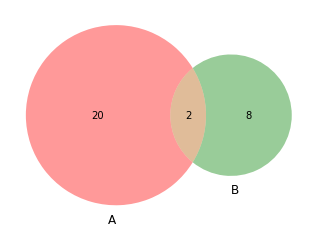

In [10]:
vn.venn2(subsets=(20,8,2))